In [2]:
# If you want the figures to appear in the notebook, 
# and you want to interact with them, use
# %matplotlib notebook

# If you want the figures to appear in the notebook, 
# and you don't want to interact with them, use
# %matplotlib inline

# If you want the figures to appear in separate windows, use
# %matplotlib qt5

# tempo switch from one to another, you have to select Kernel->Restart

%matplotlib inline

from modsim import *
import math

These are the actual functional components of the model, below:

In [12]:
rocketState = State(mFuel=10000, vCurrent=0)
rocket = System(init=rocketState, vExhaust=2550, mDry=10, dm=1169.36, dt=1)

In [71]:
def update(state, r):
    
    vf = state.vCurrent + r.vExhaust * math.log((r.mDry + state.mFuel)/(r.mDry + state.mFuel - (r.dm * r.dt))) - (9.8 *r.dt)
    dv = vf - state.vCurrent
    # No negative velocities allowed
    if vf < 0:
        vf = 0
    
    return State(mFuel=state.mFuel-(r.dm*r.dt), vCurrent=vf, dv=dv)

In [47]:
def update2(state, r):
    
    t = state.mFuel / r.dm
    vf = state.vCurrent + r.vExhaust * math.log((r.mDry + state.mFuel)/r.mDry) - (9.8 * t)
    
    return State(mFuel=state.mFuel-r.dm, vCurrent=vf)

In [72]:
def run_simulation(r, update_func):
    
    frame = TimeFrame(columns=r.init.index)
    t0 = 0
    frame.loc[t0] = r.init
    
    # This technically makes the model a little less
    # accurate but it prevents math errors later
    r.init.mFuel = r.init.mFuel - (r.init.mFuel % r.dm)
    tBurn = math.ceil(r.init.mFuel / rocket.dm)
    
    #dt = 1   # DO NOT CHANGE THIS, MASS FLOW RATE IS IN KG/SECOND
    ts = linrange(t0, tBurn-r.dt, r.dt)
    #print(ts)
    
    for t in ts:
        #print(update_func(frame.loc[t], r))
        frame.loc[t+r.dt] = update_func(frame.loc[t], r)
        
    r.results = frame
    

In [78]:
rocketState = State(mFuel=12000, vCurrent=0, dv=0)
rocket = System(init=rocketState, vExhaust=2550, mDry=10, dm=500, dt=0.5)
run_simulation(rocket, update)
rocket.results

,mFuel,vCurrent,dv
0.0,12000.0,0.000000,0.000000
0.5,11750.0,48.741019,48.741019
1.0,11500.0,98.634704,49.893685
1.5,11250.0,149.731684,51.096980
2.0,11000.0,202.085998,52.354314
2.5,10750.0,255.755407,53.669410
3.0,10500.0,310.801751,55.046343
3.5,10250.0,367.291331,56.489580
4.0,10000.0,425.295359,58.004028
4.5,9750.0,484.890451,59.595092


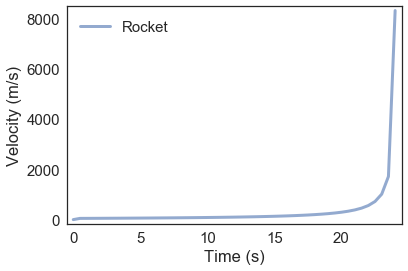

In [79]:
plot(rocket.results.dv, label='Rocket')
decorate(xlabel='Time (s)',
         ylabel='Velocity (m/s)')

<b>Parameters for geostationary orbit</b> <br>
Orbit Height: 35,786,000 m (35,786 km) <br>
Velocity: 3,070 m/s (3.07 km/s)

In [16]:
#def run_sweep(rocketState, r, m_low, m_high):    
#    sweep = 
    
def final_v(rocket):
    if hasattr(rocket, 'results'):
        return rocket.results.vCurrent[len(rocket.results.vCurrent)-1]
    else:
        return rocket.init.vCurrent

    
def error_func(mFuel):
    r = rocket
    r.init.mFuel = mFuel #sets the state to given fuel value
    run_simulation(r, update)
    #print("-----------------")  # Comment this out
    #print("Testing fuel mass: " + str(mFuel))
    #print("vFinal: " + str(final_v(r)))     # Comment this out
    return final_v(r) - 3070
    

In [80]:
rocketState = State(mFuel=0, vCurrent=0)#why is mFuel 0?
rocket = System(init=rocketState, vExhaust=2550, mDry=10, dm=1169.36)

solution = fsolve(error_func, 2000, xtol=1e-4)
print("mFuel: " + str(solution[0]))

NameError: name 'error_func' is not defined

In [24]:
# This is just copied from notebook 7, it doesn't function yet

sweep = SweepSeries()
for mD in linrange(0, 30, 2): #sweeping dry masses
    rocketState = State(mFuel=0, vCurrent=0) 
    rocket = System(init=rStateCurr, vExhaust=2550, mDry=mD, dm=1169.36)
    solution = fsolve(error_func, 2000, xtol=1e-4)
    
    sweep[mD] = solution[0]

In [25]:
print(sweep)

0     3330.467509
2     1666.331629
4     1664.432502
6     1662.909119
8     1660.109197
10    1658.359110
12    1656.138783
14    3316.377586
16    3314.372948
18    4677.320208
20    1648.278218
22    1646.708207
24    1644.502178
26    1642.749858
28    1640.864925
30    3300.394572
dtype: float64


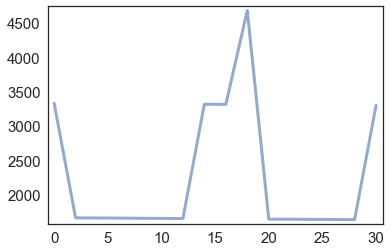

In [26]:
plot(sweep)